## Lecture 7: PACF

**Main sections of L7:**

* Introducing PACF;
* The three (iterative) steps of model building
    * Model **Identification**
        * Candidate p, d, q combinations for ARIMA
        * Plot data - differencing needed?
        * ACF and PACF - clear cut offs?
    * Parameter estimation
        * $\hat{\phi}_{k}$, $\hat{\theta_{i}}$
    * Model **adequecy**
        * Satisfying model fit and diagnostic plots
        * "Does the model fit the data"?
        *  AIC?
* White noise processes
    * White noise sample ACF $\sim \text{NID}(0,\dfrac{1}{T})$
    * AR(p) process: sample PACF when $u > p, \sim \text{NID}(0,\dfrac{1}{T})$

In [5]:
price <- c(5.8, 6.1, 5.4, 6.2, 5.0, 4.6, 5.8, 5.1, 5.3, 5.1, 4.8, 5.3, 6.8, 9.0, 8.6, 
9.0, 7.4, 6.4, 4.8, 3.9, 3.9, 5.6, 5.7, 7.5, 7.3, 7.4, 7.5, 9.7, 6.1, 6.0, 5.7, 5.0, 
4.2, 4.6, 5.9, 5.4, 5.4, 5.4, 5.6, 7.6, 7.4, 5.4, 5.1, 6.9, 7.5, 5.9, 6.2, 5.6, 5.8, 
5.6, 6.6, 4.8, 5.2, 4.5, 4.4, 5.3, 5.0, 6.4, 7.8, 8.5, 5.6, 7.1, 7.1, 8.0, 7.3, 5.7, 
4.8, 4.3, 4.4, 5.7, 4.7, 4.1, 4.1, 4.7, 7.0, 8.7, 6.2, 5.9, 5.4, 6.3, 4.9, 5.5, 5.4, 
4.7, 4.1, 4.6, 4.8, 4.5, 4.7, 4.8, 5.4, 6.0, 5.1, 6.5, 6.2, 4.6, 4.5, 4.0, 4.1, 4.7,
5.1, 5.2, 5.3, 4.8, 5.0, 6.2, 6.4, 4.7, 4.1, 3.9, 4.0, 4.9, 4.9, 4.8, 5.0, 4.9, 4.9, 
5.4, 5.6, 5.0, 4.5, 5.0, 7.2, 6.1)

In [6]:
# use time series function to transform it into time series format (auto indexes the t's)
BP.ts <- ts(price, start=1634, frequency = 1)

In [7]:
# quick summary
summary(BP.ts)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.900   4.800   5.400   5.652   6.200   9.700 

## Timeseries Plot

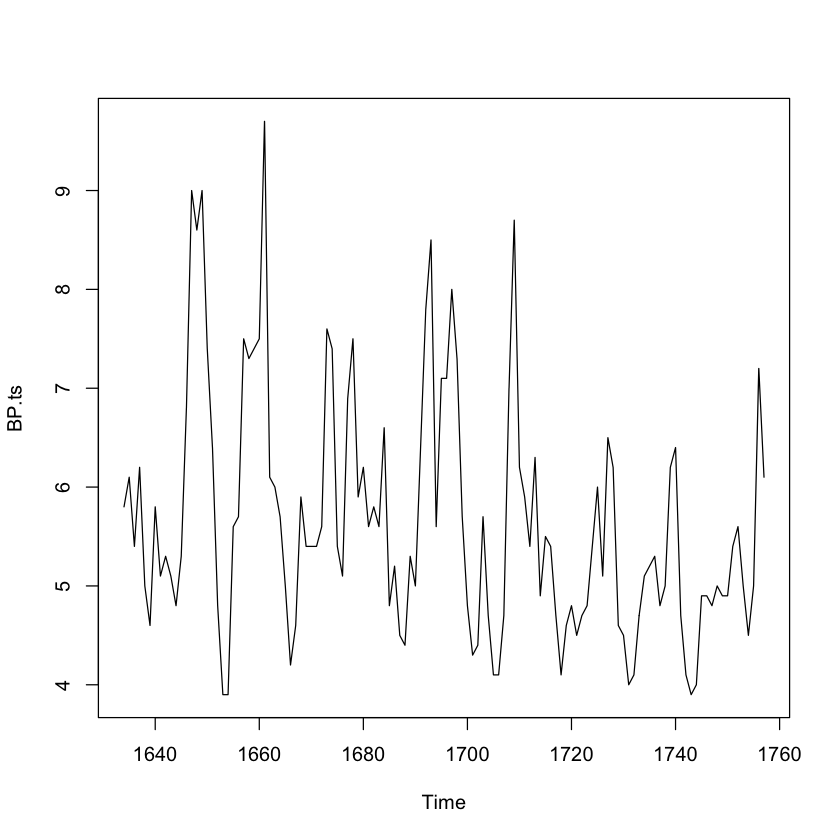

In [9]:
plot(BP.ts)

## ACF for bread prices

* Geometric decrease, showing either AR(p) or ARMA(p,q) process
* Not linearly decreasing which would indicate a non-stationary process

Looking at the white noise confidence interval:

* Recall that for sample ACF: ${r_{\tau}}$, if underlying process is white noise process, then ${r_{\tau}} \sim \text{NID}(0,\dfrac{1}{T})$

* Therefore the $100(1-\alpha)\%$ confidence interval is given by:

> $0 \pm z_{0.025} \times \dfrac{1}{\sqrt{T}}$

In [17]:
z.0.025 <- qnorm(0.025, lower.tail = FALSE)
z.0.025

[1] 1.959964

In [19]:
T <- length(BP.ts)

se <- 1 / sqrt(T)

se

[1] 0.08980265

### 95% confidence interval calculation for white noise process

> Note, this is also the same as a PACF 95% confidence interval for a AR(p) process for $\hat{\phi}_{uu}$ where $u>p$.

In [21]:
CI.95 <- 0 + c(-z.0.025*se, z.0.025*se)
CI.95

[1] -0.17601  0.17601

## ACF

* Can clearly see that several lags have autocorrelations that fall outside of the 95% confidence interval for a white noise process, so we can reject the hypothesis that our underlying process is white noise.

*  Geometric decrease in the trend and no severe cut  off in the ACF suggests this is not an MA(q) process, most likely an AR(p) process or an ARMA(p,q) process.

* The evidence to suggest this is a stationary, rather than non-stationary process, is the geometric rather than linear decrease in the ACF with increased lags.

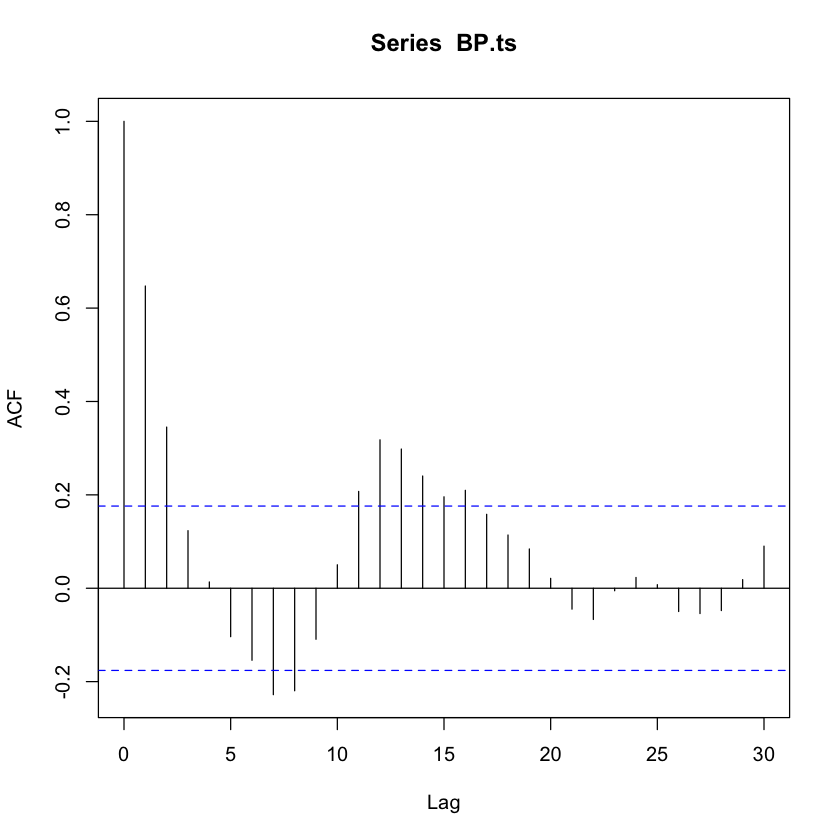

In [22]:
acf(BP.ts, lag=30)

## PACF

* Sample PACF has cut off at $\tau = 1$, indicating that we are dealing with an AR(1) process.

*  For an AR(1)  model, the $p$th parameter is the only  parameter - $\phi$ - which is equal to $\phi_{uu} = \phi_{pp} = \phi_{p} = \phi_{1}$.

* Therefore our estimate for the AR(1)  parameter is $0.647$.

* Note! This is also the same as the $r_{\tau} = r_{1}$ sample autocorrelation value, since the partial autocorrelation and the sample **partial** autocorrelation are the same when there are no intervening variables.

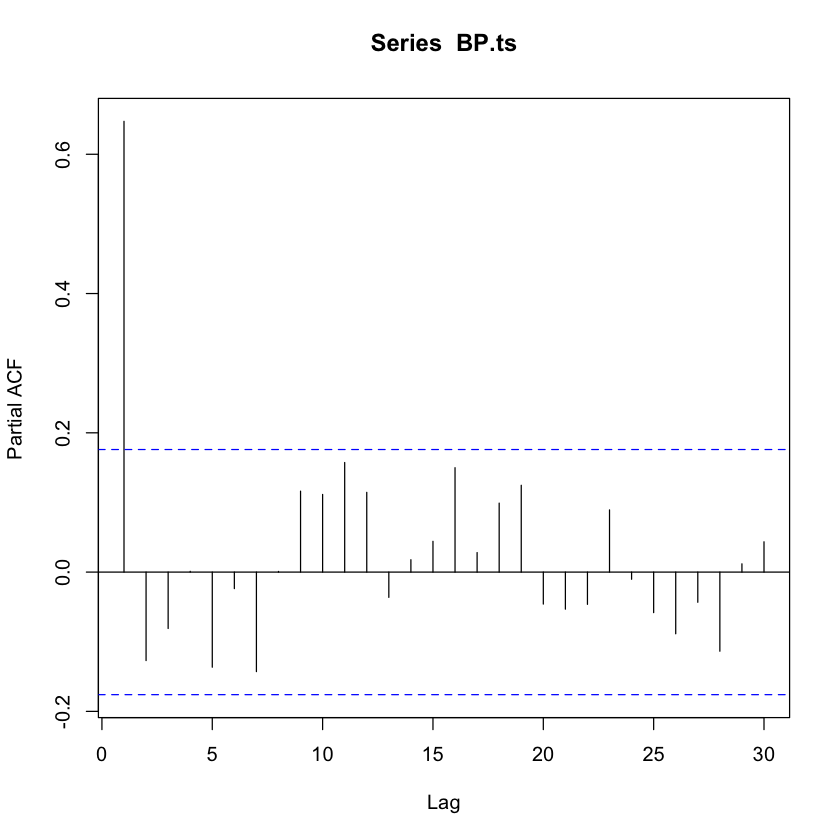

In [11]:
pacf(BP.ts, lag=30)

In [23]:
pacf(BP.ts, lag=30, plot = FALSE)


Partial autocorrelations of series ‘BP.ts’, by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.647 -0.127 -0.081  0.001 -0.137 -0.024 -0.143  0.001  0.116  0.111  0.157 
    12     13     14     15     16     17     18     19     20     21     22 
 0.115 -0.036  0.018  0.044  0.150  0.028  0.099  0.125 -0.046 -0.053 -0.046 
    23     24     25     26     27     28     29     30 
 0.089 -0.010 -0.058 -0.089 -0.043 -0.114  0.012  0.043 

---

&nbsp;

&nbsp;

## The Akaike Information Criteria (AIC)

> Is a goodness of fit statistic that provides a tradeoff between the fit to the data and the number of parameters in the model (i.e. it's a score that will favour parsimony for equally performing models).

> $AIC \approx T \ln{\hat{\sigma}^{2}} + 2n + \text{constant}$

where

* $n$ is the number of parameters fit in the model,
* $\hat{\sigma}^{2}$ is the estimated white noise variance,
* $T$ is the length of the  observed series.

**Models with the smallest AIC are viewed more favourably**

You want the estimated white noise variance to be as low as possible, as  this is the random part  of the model.

> If this is zero, then it means the systematic part is bang on with its predictions.

> If  this is high, then it means the  systematic part (used for prediction) is lost amongst the noise.

### Interesting  practical tip:

**AIC often over-favours models with a higher number of parameters.**

---

&nbsp;

&nbsp;

# Fitting ARIMA models

> Models fit in R estimate parameters using  MLE

> When  fitting ARMA model, $d=0$, R **includes** a process mean term.

> When fitting an ARIMA model (i.e. with a non-zero differencing term), R **does not include** a process mean term.

## ARMA(1,0) = AR(1)

* Note the  closeness of the $\phi$ parameter estimate to the  0.647 estimate we read off the ACF earlier.

* **CRUCIAL**: *THE  INTERCEPT IS THE  PROCESS MEAN*

Model fit below:

> $Y_{t} = 0.6429 \times (Y_{t-1} - 5.6608) + \epsilon_{t}$

In [26]:
ar.1 <- arima(BP.ts, order = c(1,0,0))

ar.1


Call:
arima(x = BP.ts, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.6429     5.6608
s.e.  0.0678     0.2307

sigma^2 estimated as 0.8655:  log likelihood = -167.26,  aic = 340.52

## Can calculate  a 95% confidence interval for the parameters provided using a **t-distribution**, since we're estimating the variance.

In [32]:
T <- length(BP.ts)

# we've used up three degrees of freedom: 
df <- T - 3

# number of standard errors for 95% confidence interval
t.0.025.141 <- qt(0.025, df, lower.tail = FALSE)

phi.1 <- 0.6429

se <- 0.0678

In [34]:
# 95% confidence interval for phi.1
phi.1 + c(-t.0.025.141*se, t.0.025.141*se)

[1] 0.508672 0.777128

---

&nbsp;

&nbsp;

## ARIMA(2,0,0) = AR(2)

In [35]:
ar.2 <- arima(BP.ts, order=c(2,0,0))

ar.2


Call:
arima(x = BP.ts, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      0.7231  -0.1235     5.6546
s.e.  0.0888   0.0892     0.2051

sigma^2 estimated as 0.8521:  log likelihood = -166.31,  aic = 340.62

---

# Model comparison

* AR(1) has smaller (better) AIC than AR(2).

In [36]:
length(BP.ts)

[1] 124